# WeatherPy
----
## Analysis
#### 1. Given the data, the warm weather seems to increase somewhere close in between the equator (0 degrees latitude) and 20 degrees latitude. The temperature seems to be at it's highest peak at 20 degrees latitude and is at it's lowest between 60 and 80 degrees latitude according to the latitude and max temperature plot chart.

#### 2. There is not much of a relationship between latitude and cloudiness. Although it is interesting to see a strong amount of cities that sit directly on 0, 80, and 100% cloudiness.

#### 3. I did not find much of a relationship between latitude and wind speed, but there is a small amount of cities with 20-25 mph winds with a few cities that have 35 mph wind speed.

----
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Call API
units = "imperial"
base_url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Create a list to store the weather data for each city
city_names = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("---------------------------------")

record = 1
record_set = 1

for city in cities:
    response = requests.get(query_url + city).json()
    
    if response ["cod"] == '404':
        print("City Not Found. Skipping...")
    else:    
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {record} of Set {record_set} | {city}")
        record += 1
        
# Create count for processing records. Split into groups for easier viewing
    if record == 51:
        record_set += 1
        record = 1
        
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | mataura
City Not Found. Skipping...
Processing Record 4 of Set 1 | butaritari
City Not Found. Skipping...
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | san patricio
City Not Found. Skipping...
Processing Record 9 of Set 1 | shakiso
City Not Found. Skipping...
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | taua
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | nikolskoye
City Not Found. Skipping...
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set

City Not Found. Skipping...
Processing Record 32 of Set 4 | chernolesskoye
Processing Record 33 of Set 4 | saint-augustin
Processing Record 34 of Set 4 | nhulunbuy
Processing Record 35 of Set 4 | port macquarie
Processing Record 36 of Set 4 | dikson
Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | kodiak
Processing Record 39 of Set 4 | sarh
Processing Record 40 of Set 4 | zagare
City Not Found. Skipping...
Processing Record 41 of Set 4 | mehamn
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | namtsy
City Not Found. Skipping...
Processing Record 45 of Set 4 | neosho
Processing Record 46 of Set 4 | mirzapur
Processing Record 47 of Set 4 | cap-aux-meules
Processing Record 48 of Set 4 | ekhabi
Processing Record 49 of Set 4 | blagoyevo
Processing Record 50 of Set 4 | boende
Processing Record 1 of Set 5 | chakia
Processing Record 2 of Set 5 | umm kaddadah
Processing Record 3 of Set 5 | kolvereid
Processing Reco

Processing Record 18 of Set 8 | richards bay
City Not Found. Skipping...
Processing Record 19 of Set 8 | sasina
Processing Record 20 of Set 8 | romodanovo
Processing Record 21 of Set 8 | semporna
Processing Record 22 of Set 8 | saint-pierre
Processing Record 23 of Set 8 | diffa
Processing Record 24 of Set 8 | manaquiri
Processing Record 25 of Set 8 | troitskoye
Processing Record 26 of Set 8 | mount isa
City Not Found. Skipping...
Processing Record 27 of Set 8 | kirksville
Processing Record 28 of Set 8 | tena
Processing Record 29 of Set 8 | ormara
Processing Record 30 of Set 8 | benevides
City Not Found. Skipping...
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | bethal
Processing Record 33 of Set 8 | tortosa
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | dandong
Processing Record 36 of Set 8 | antofagasta
City Not Found. Skipping...
Processing Record 37 of Set 8 | tazovskiy
Processing Record 38 of Set 8 | bicester
City Not Found. Skip

Processing Record 50 of Set 11 | zhanaozen
Processing Record 1 of Set 12 | kununurra
Processing Record 2 of Set 12 | yarada
Processing Record 3 of Set 12 | namibe
Processing Record 4 of Set 12 | tucurui
---------------------------------
Data Retrieval Complete
---------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dataframe
weather_data = pd.DataFrame({
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# Display the dataframe
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Latitude      554
Longitude     554
Max Temp      554
Wind Speed    554
dtype: int64

In [6]:
# Export the city data in a csv
weather_data.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

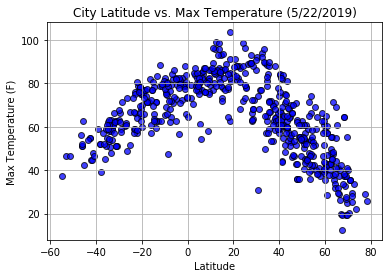

In [17]:
# Build a scatter plot for latitude and max temperature
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Max Temperature (5/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
#plt.xlim([-60, 85])
#plt.ylim([-5, 105])

# Save image 
plt.savefig("output_data/lat_vs_max_temp.png")

#### Latitude vs. Humidity Plot

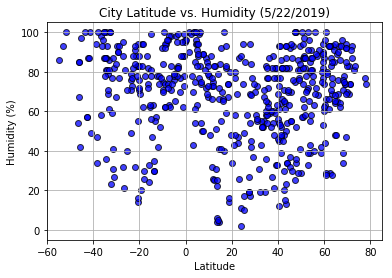

In [15]:
# Build scatter plot for latitude and Humidity
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Humidity (5/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim([-60, 85])
plt.ylim([-5, 105])

# Save image 
plt.savefig("output_data/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

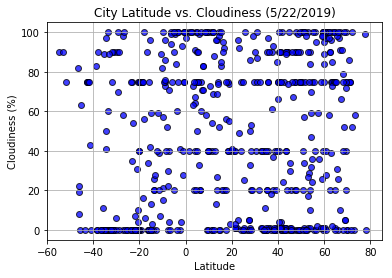

In [19]:
# Build scatter plot for latitude and Cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (5/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-60, 85])
plt.ylim([-5, 105])

# Save image 
plt.savefig("output_data/lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

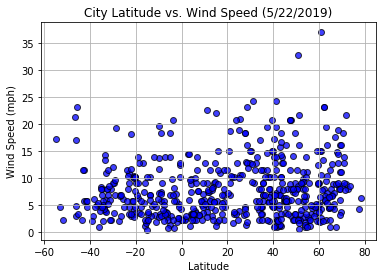

In [22]:
# Build scatter plot for latitude and Wind Speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (5/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#plt.xlim([-60, 85])
#plt.ylim([-5, 105])

# Save image 
plt.savefig("output_data/lat_vs_wind_speed.png")